In [6]:
import findspark
findspark.init()
findspark.find()
import pyspark

from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

#conf = pyspark.SparkConf().setAppName('appName').setMaster('local')
#sc = pyspark.SparkContext(conf=conf)
#spark = SparkSession(sc)

spark = pyspark.sql.SparkSession.builder.appName("MyApp") \
    .config("spark.jars.packages", "io.delta:delta-core_2.12:0.7.0") \
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog") \
    .getOrCreate()

from delta.tables import *

In [7]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", 20)

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# from IPython.display import IFrame
# IFrame(src='https://www.x-plane.com/kb/data-set-output-table/', width=900, height=600)

#how to run jupyter from a remote server
#https://www.digitalocean.com/community/tutorials/how-to-install-run-connect-to-jupyter-notebook-on-remote-server

In [40]:
pdf = pd.read_csv('../data/20201002_cessna172.txt', sep='|')

def clean_dataframe_column_names(df):
    new_column_names = []

    for col in df.columns:
        new_col = col.lstrip().rstrip().lower().replace(" ", "_"). \
        replace("__", "").replace(",", "_").replace("__", "_").replace(",", ""). \
        replace(".", "").replace("*", "").replace("-", "_").replace("0/1", "zero_or_one"). \
        replace("/", "_per_").replace("#", "number")#strip beginning spaces, makes lowercase, add underscpre
        new_column_names.append(new_col)

    column_names_mapping = dict(zip(df.columns,new_column_names))
    df.rename(columns = column_names_mapping, inplace = True)
    return df,column_names_mapping

pdf,column_names_mapping = clean_dataframe_column_names(pdf)

In [47]:
column_names_mapping

{'  f-act,_/sec ': 'f_act__per_sec',
 '   f-sim,_/sec ': 'f_sim__per_sec',
 '   frame,_time ': 'frame_time',
 '   __cpu,_time ': 'cpu_time',
 '   _gpu_,time_ ': '_gpu_time_',
 '   _grnd,ratio ': '_grnd_ratio',
 '   _flit,ratio ': '_flit_ratio',
 '   _real,_time ': '_real_time',
 '   _totl,_time ': '_totl_time',
 '   missn,_time ': 'missn_time',
 '   timer,_time ': 'timer_time',
 '   _zulu,_time ': '_zulu_time',
 '   local,_time ': 'local_time',
 '   hobbs,_time ': 'hobbs_time',
 '   __USE,puffs ': 'use_puffs',
 '   __TOT,puffs ': 'tot_puffs',
 '   __VIS,_tris ': 'vis_tris',
 '   _Vind,_kias ': '_vind_kias',
 '   _Vind,_keas ': '_vind_keas',
 '   Vtrue,_ktas ': 'vtrue_ktas',
 '   Vtrue,_ktgs ': 'vtrue_ktgs',
 '   _Vind,__mph ': '_vind_mph',
 '   Vtrue,mphas ': 'vtrue_mphas',
 '   Vtrue,mphgs ': 'vtrue_mphgs',
 '   _Mach,ratio ': '_mach_ratio',
 '   __VVI,__fpm ': 'vvi_fpm',
 '   Gload,norml ': 'gload_norml',
 '   Gload,axial ': 'gload_axial',
 '   Gload,_side ': 'gload_side',
 '   SLprs

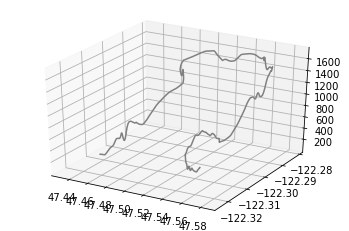

In [32]:
%matplotlib inline

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
xline = pdf.lat_deg
yline = pdf.lon_deg
zline = pdf.alt_ftagl
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
# zdata = 15 * np.random.random(100)
# xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
# ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
# ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [30]:
#https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db
BBox = pdf.lon_deg.min(), pdf.lon_deg.max(), pdf.lat_deg.min(), pdf.lat_deg.max()
BBox

(-122.32378, -122.28126999999999, 47.43139, 47.58338)

In [ ]:
#https://stackoverflow.com/questions/38507069/how-to-make-a-flight-path-projection-if-possible-in-python

f = open('../data/20201002_cessna172.kml', 'w')

#Writing the kml file.
f.write("<?xml version='1.0' encoding='UTF-8'?>\n")
f.write("<kml xmlns='http://earth.google.com/kml/2.2'>\n")
f.write("<Document>\n")
f.write("<Placemark>\n")
f.write("   <name>flight</name>\n")
f.write("   <LineString>\n")
f.write("       <extrude>1</extrude>\n")
f.write("       <altitudeMode>absolute</altitudeMode>\n")
f.write("       <coordinates>\n")
for i in range(0,len(pdf['alt_ind']),10):  #Here I skip some data
    f.write("        "+str(pdf['lon_deg'][i]) + ","+ str(pdf['lat_deg'][i]) + "," + str(pdf['alt_ind'][i]) +"\n")    
f.write("       </coordinates>\n")
f.write("   </LineString>\n")
f.write("</Placemark>\n")
f.write("</Document>")
f.write("</kml>\n")
f.close()

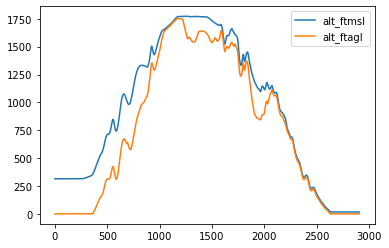

In [31]:
pdf[['alt_ftmsl','alt_ftagl']].plot.line()

In [52]:
column_names_mapping

{'  f-act,_/sec ': 'f_act__per_sec',
 '   f-sim,_/sec ': 'f_sim__per_sec',
 '   frame,_time ': 'frame_time',
 '   __cpu,_time ': 'cpu_time',
 '   _gpu_,time_ ': '_gpu_time_',
 '   _grnd,ratio ': '_grnd_ratio',
 '   _flit,ratio ': '_flit_ratio',
 '   _real,_time ': '_real_time',
 '   _totl,_time ': '_totl_time',
 '   missn,_time ': 'missn_time',
 '   timer,_time ': 'timer_time',
 '   _zulu,_time ': '_zulu_time',
 '   local,_time ': 'local_time',
 '   hobbs,_time ': 'hobbs_time',
 '   __USE,puffs ': 'use_puffs',
 '   __TOT,puffs ': 'tot_puffs',
 '   __VIS,_tris ': 'vis_tris',
 '   _Vind,_kias ': '_vind_kias',
 '   _Vind,_keas ': '_vind_keas',
 '   Vtrue,_ktas ': 'vtrue_ktas',
 '   Vtrue,_ktgs ': 'vtrue_ktgs',
 '   _Vind,__mph ': '_vind_mph',
 '   Vtrue,mphas ': 'vtrue_mphas',
 '   Vtrue,mphgs ': 'vtrue_mphgs',
 '   _Mach,ratio ': '_mach_ratio',
 '   __VVI,__fpm ': 'vvi_fpm',
 '   Gload,norml ': 'gload_norml',
 '   Gload,axial ': 'gload_axial',
 '   Gload,_side ': 'gload_side',
 '   SLprs

In [58]:
#sdf = spark.read.option("header", "true").option("delimiter", "|").csv('../data/20201002_cessna172.txt')

# for colname in sdf.columns:
#     sdf = sdf.withColumnRenamed(column_names_mapping[colname], colname)

sdf = spark.createDataFrame(pdf)

In [59]:
sdf.columns

['f_act__per_sec',
 'f_sim__per_sec',
 'frame_time',
 'cpu_time',
 '_gpu_time_',
 '_grnd_ratio',
 '_flit_ratio',
 '_real_time',
 '_totl_time',
 'missn_time',
 'timer_time',
 '_zulu_time',
 'local_time',
 'hobbs_time',
 'use_puffs',
 'tot_puffs',
 'vis_tris',
 '_vind_kias',
 '_vind_keas',
 'vtrue_ktas',
 'vtrue_ktgs',
 '_vind_mph',
 'vtrue_mphas',
 'vtrue_mphgs',
 '_mach_ratio',
 'vvi_fpm',
 'gload_norml',
 'gload_axial',
 'gload_side',
 'slprs_inhg',
 'sltmp_degc',
 '_wind_speed',
 '_wind_dir',
 'trb_locl',
 '_prec_locl',
 '_hail_locl',
 'amprs_inhg',
 'amtmp_degc',
 'letmp_degc',
 '_dens_ratio',
 'a_ktas',
 'q_psf',
 'gravi_fts2',
 'baro__inhg',
 'edens_part',
 'vacum_ratio',
 'vacum_ratio_1',
 '_elec_ratio',
 '_elec_ratio_1',
 '_ahrs_ratio',
 '_ahrs_ratio_1',
 '_elev_stick',
 'ailrn_stick',
 'ruddr_stick',
 'sweep_1_deg',
 'sweep_2_deg',
 'sweep_h_deg',
 '_vect_ratio',
 'sweep_ratio',
 'incid_ratio',
 'dihed_ratio',
 'retra_ratio',
 '_elev_astab',
 'ailrn_astab',
 'ruddr_astab',
 '_e

In [60]:
sdf.write.format("delta").save("../data/delta/20201002_cessna172")

In [61]:
ddf = spark.read.format("delta").load("../data/delta/20201002_cessna172")
ddf.show()

+------------------+------------------+--------------------+--------------------+--------------------+-----------+-----------+-----------------+------------------+------------------+----------+------------------+------------------+------------------+---------+---------+--------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+-------------------+-------------------+------------------+--------------------+--------------------+----------+----------+-----------+---------+--------+----------+----------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+----------+------------------+------------------+------------------+-----------+-------------+-----------+-------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------